In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Loan.xlsx')

# Display the first few rows of the dataset to understand its structure
df.head(),


(  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
 0   Male     Yes          1      Graduate            No             4583   
 1   Male     Yes          0      Graduate           Yes             3000   
 2   Male     Yes          0  Not Graduate            No             2583   
 3   Male      No          0      Graduate            No             6000   
 4   Male     Yes          0  Not Graduate            No             2333   
 
    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 0             1508.0         128             360.0             1.0   
 1                0.0          66             360.0             1.0   
 2             2358.0         120             360.0             1.0   
 3                0.0         141             360.0             1.0   
 4             1516.0          95             360.0             1.0   
 
   Property_Area Loan_Status  
 0         Rural           N  
 1         Urban           Y  
 2         Urba

In [ ]:
df.isnull().sum()

,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11
Credit_History,30


In [ ]:
# Fill missing values for categorical data with mode
for column in ['Gender', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values for numerical data with median
for column in ['Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify that missing values have been filled
df.isnull().sum(), df.head()

(Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
 0   Male     Yes          1      Graduate            No             4583   
 1   Male     Yes          0      Graduate           Yes             3000   
 2   Male     Yes          0  Not Graduate            No             2583   
 3   Male      No          0      Graduate            No             6000   
 4   Male     Yes          0  Not Graduate            No             2333   
 
    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 0             1508.0         128             360.0             1.0   
 1                0.0          66             360.0             1.0   
 2             2358.

In [ ]:
# Convert categorical variables to dummy variables (one-hot encoding) and convert them to int type
df= pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents'], drop_first=True).astype(int)

# Display the first few rows of the modified dataset to verify changes
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,4583,1508,128,360,1,1,1,0,0,0,0,0,1,0,0
1,3000,0,66,360,1,1,1,0,1,0,1,1,0,0,0
2,2583,2358,120,360,1,1,1,1,0,0,1,1,0,0,0
3,6000,0,141,360,1,1,0,0,0,0,1,1,0,0,0
4,2333,1516,95,360,1,1,1,1,0,0,1,1,0,0,0


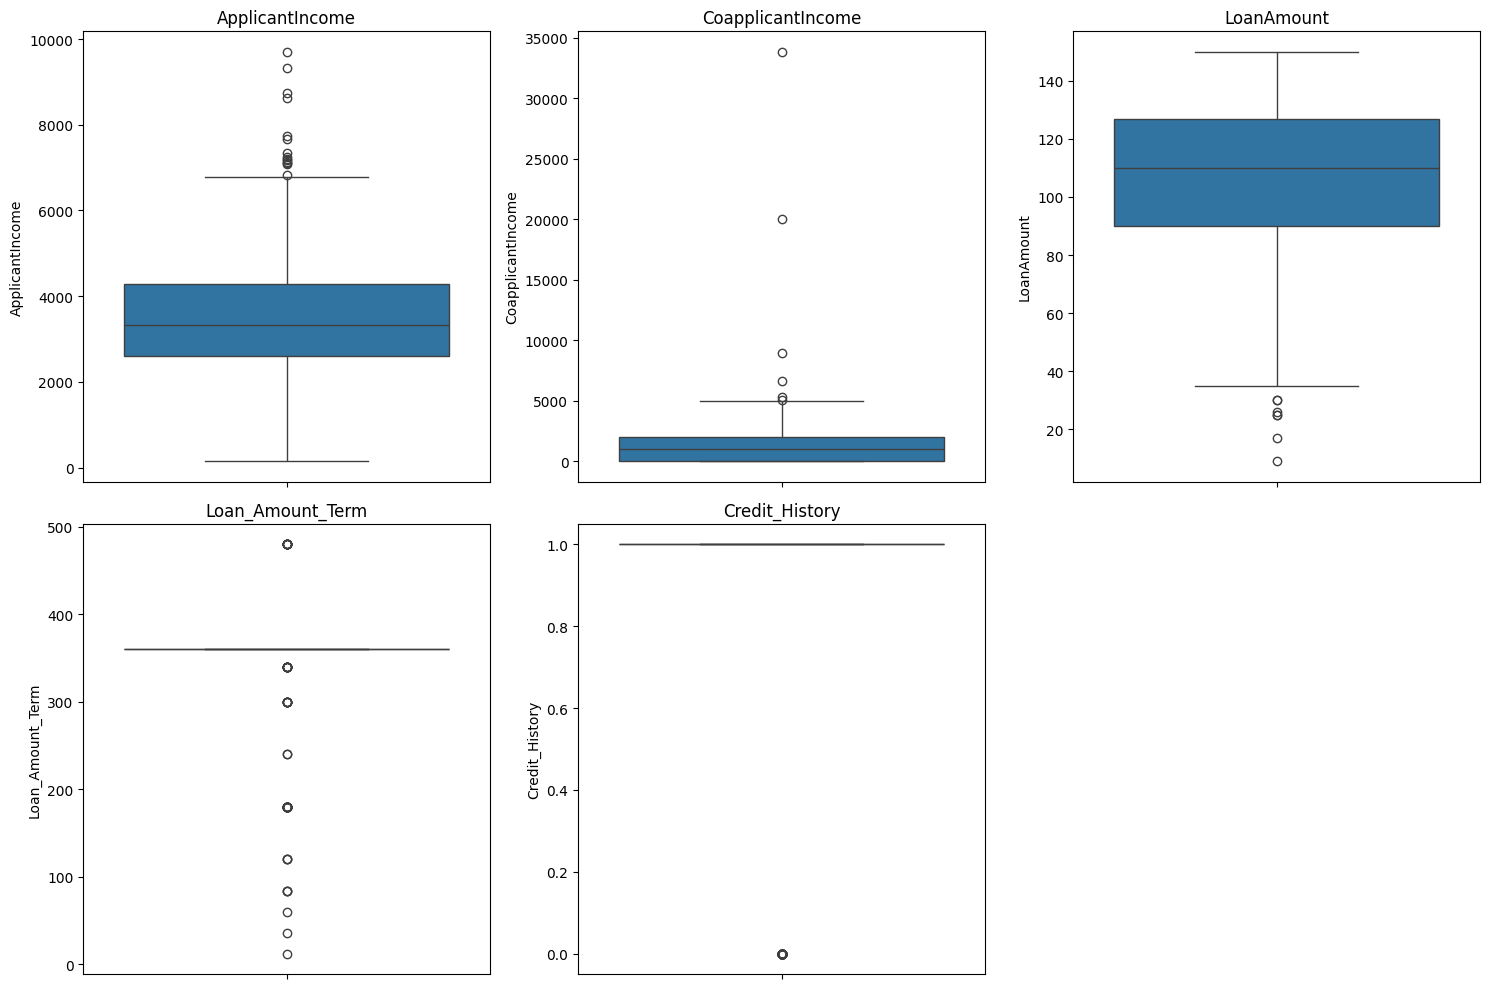

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of numerical columns to check for outliers
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plotting boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The boxplots for each numerical column in the dataset provide insights into the presence of outliers:

ApplicantIncome: There are several outliers present, indicating that some applicants have significantly higher incomes than the majority.
CoapplicantIncome: Similar to ApplicantIncome, this column also has outliers, showing that some co-applicants have much higher incomes.
LoanAmount: Outliers are present, indicating loans that are significantly higher than most of the loans in the dataset.
Loan_Amount_Term: Most loan terms cluster around common values (notably 360 months), with a few outliers, particularly for very short loan terms.
Credit_History: Given its binary nature, Credit_History does not have "outliers" in the traditional sense, but its distribution can be seen as primarily 1s (indicating a good credit history) with fewer 0s.
These outliers could be genuine due to the natural variation in incomes and loan amounts, or they could be errors. **bold text**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Split the dataset into training and testing sets
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Recall:", train_recall)
print("Training Precision:", train_precision)

print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Recall:", test_recall)
print("Testing Precision:", test_precision)


Training Accuracy: 0.805921052631579
Training F1 Score: 0.8703296703296703
Training Recall: 0.9209302325581395
Training Precision: 0.825
Testing Accuracy: 0.7402597402597403
Testing F1 Score: 0.8333333333333334
Testing Recall: 0.8928571428571429
Testing Precision: 0.78125


In [ ]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

# Calculate the evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Calculate the evaluation metrics for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Recall:", train_recall)
print("Training Precision:", train_precision)

print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Recall:", test_recall)
print("Testing Precision:", test_precision)


Training Accuracy: 0.7993421052631579
Training F1 Score: 0.8641425389755011
Training Recall: 0.9023255813953488
Training Precision: 0.8290598290598291
Testing Accuracy: 0.7532467532467533
Testing F1 Score: 0.8403361344537815
Testing Recall: 0.8928571428571429
Testing Precision: 0.7936507936507936


In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)
scaler.fit(X_test)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Predict the labels for the training and testing data
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Calculate the evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Calculate the evaluation metrics for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Recall:", train_recall)
print("Training Precision:", train_precision)

print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Recall:", test_recall)
print("Testing Precision:", test_precision)


Training Accuracy: 0.8256578947368421
Training F1 Score: 0.8814317673378077
Training Recall: 0.9162790697674419
Training Precision: 0.8491379310344828
Testing Accuracy: 0.7272727272727273
Testing F1 Score: 0.823529411764706
Testing Recall: 0.875
Testing Precision: 0.7777777777777778


Training Accuracy: 1.0
Training F1 Score: 1.0
Training Recall: 1.0
Training Precision: 1.0
Testing Accuracy: 0.6103896103896104
Testing F1 Score: 0.736842105263158
Testing Recall: 0.75
Testing Precision: 0.7241379310344828


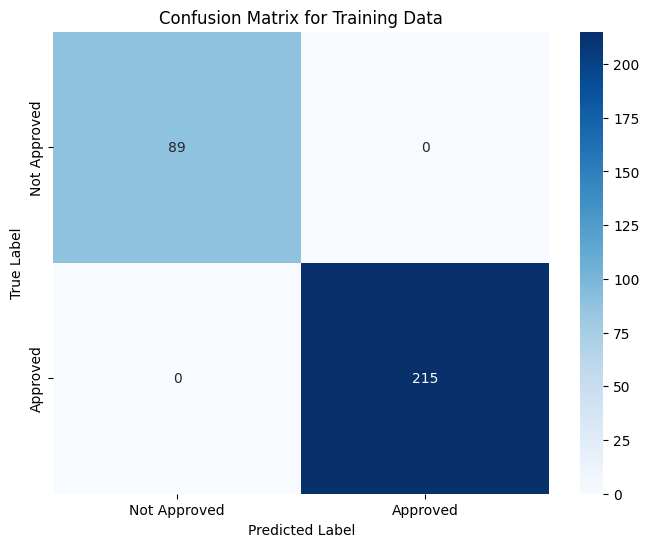

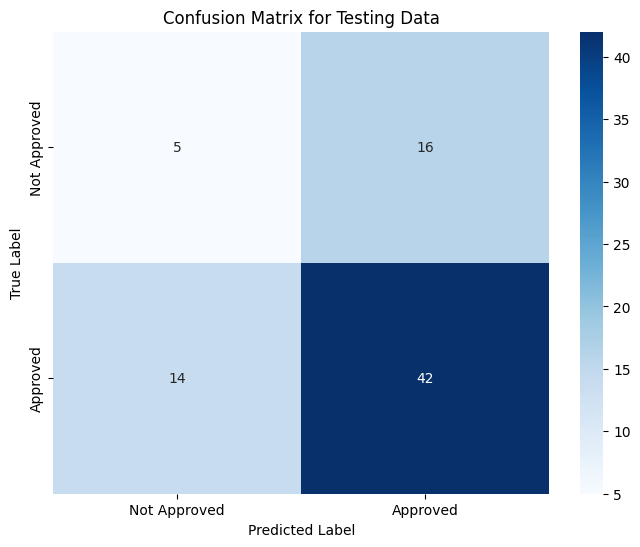

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Calculate the evaluation metrics for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Recall:", train_recall)
print("Training Precision:", train_precision)

print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Recall:", test_recall)
print("Testing Precision:", test_precision)

# Create a confusion matrix for the training data
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)

# Create a confusion matrix for the testing data
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Training Data')
plt.show()

# Plot the confusion matrix for the testing data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Data')
plt.show()


In [ ]:


# Prune the decision tree to reduce overfitting
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

# Evaluate the pruned decision tree on the training and testing data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate the evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Calculate the evaluation metrics for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training Recall:", train_recall)
print("Training Precision:", train_precision)

print("Testing Accuracy:", test_accuracy)
print("Testing F1 Score:", test_f1)
print("Testing Recall:", test_recall)
print("Testing Precision:", test_precision)


Training Accuracy: 0.8092105263157895
Training F1 Score: 0.8733624454148472
Training Recall: 0.9302325581395349
Training Precision: 0.823045267489712
Testing Accuracy: 0.7272727272727273
Testing F1 Score: 0.8264462809917357
Testing Recall: 0.8928571428571429
Testing Precision: 0.7692307692307693


In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate the accuracy score for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Create a confusion matrix for the training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:\n", cm_train)

# Create a confusion matrix for the testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Testing Data:\n", cm_test)


Training Accuracy: 1.0
Testing Accuracy: 0.7272727272727273
Confusion Matrix for Training Data:
 [[ 89   0]
 [  0 215]]
Confusion Matrix for Testing Data:
 [[ 4 17]
 [ 4 52]]


In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate the accuracy score for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 0.8289473684210527
Testing Accuracy: 0.7272727272727273


In [ ]:
# prompt: apply gradient boosting model get accuracy score , confusion matrix for both test and train

from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Calculate the accuracy score for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Create a confusion matrix for the training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:\n", cm_train)

# Create a confusion matrix for the testing data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Testing Data:\n", cm_test)


Training Accuracy: 0.9605263157894737
Testing Accuracy: 0.7012987012987013
Confusion Matrix for Training Data:
 [[ 79  10]
 [  2 213]]
Confusion Matrix for Testing Data:
 [[ 5 16]
 [ 7 49]]


In [ ]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_gb = GradientBoostingClassifier(**best_params, random_state=42)
best_gb.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_train_pred = best_gb.predict(X_train)
y_test_pred = best_gb.predict(X_test)

# Calculate the accuracy score for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy score for the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.8322368421052632
Testing Accuracy: 0.7272727272727273
